In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
file_path = 'Housing.csv'
dataset = pd.read_csv(file_path)
print(dataset.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [23]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [24]:
x = dataset[['area']].values  # Features
y = dataset['price'].values  

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
regressor.fit(x_scaled, y)
print(f"Final parameters: Coefficients = {regressor.coef_}, Intercept = {regressor.intercept_}")

Final parameters: Coefficients = [1037605.69999988], Intercept = [4705755.51186686]


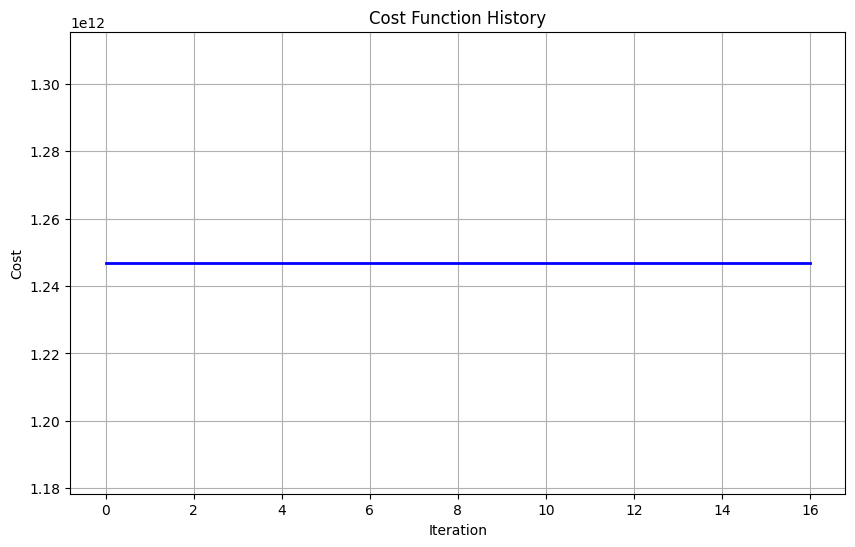

In [27]:
loss_history = []

# Extract the number of iterations performed
n_iter = regressor.n_iter_
coef = regressor.coef_
intercept = regressor.intercept_

# Calculate and store the loss at each iteration
for i in range(n_iter):
    y_pred = np.dot(x_scaled, coef) + intercept
    loss = np.mean((y_pred - y) ** 2) / 2
    loss_history.append(loss)

# Create a plot for the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), loss_history, 'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.grid(True)
plt.show()

### Straight line?
It means there is a problem
1. dataset
2. preprocessing of data 

otherwise it gives a curve like `soupbowl`